In [28]:
# Basic Imports
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Dataset Directories
BASE_DIR = "../data"
TRAIN_DIR = os.path.join(BASE_DIR, "Training")
TEST_DIR = os.path.join(BASE_DIR, "Testing")

CLASSES = ["glioma", "meningioma", "pituitary", "notumor"]

print("Environment set up successfully.")

Environment set up successfully.


,Train,Test
glioma,1321,300
meningioma,1339,306
pituitary,1457,300
notumor,1595,405


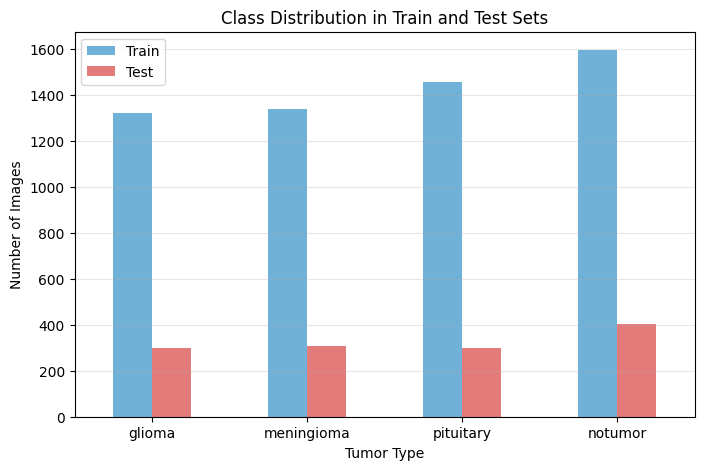

In [29]:
# Count number of images per class
train_counts = {c: len(os.listdir(os.path.join(TRAIN_DIR, c))) for c in CLASSES}
test_counts  = {c: len(os.listdir(os.path.join(TEST_DIR, c))) for c in CLASSES}

df_counts = pd.DataFrame({"Train": train_counts, "Test": test_counts})
display(df_counts)

# Bar chart for visualization
df_counts.plot(kind="bar", figsize=(8,5), rot=0, color=["#6fb1d7", "#e37b7b"])
plt.title("Class Distribution in Train and Test Sets")
plt.ylabel("Number of Images")
plt.xlabel("Tumor Type")
plt.grid(axis="y", alpha=0.3)
plt.show()

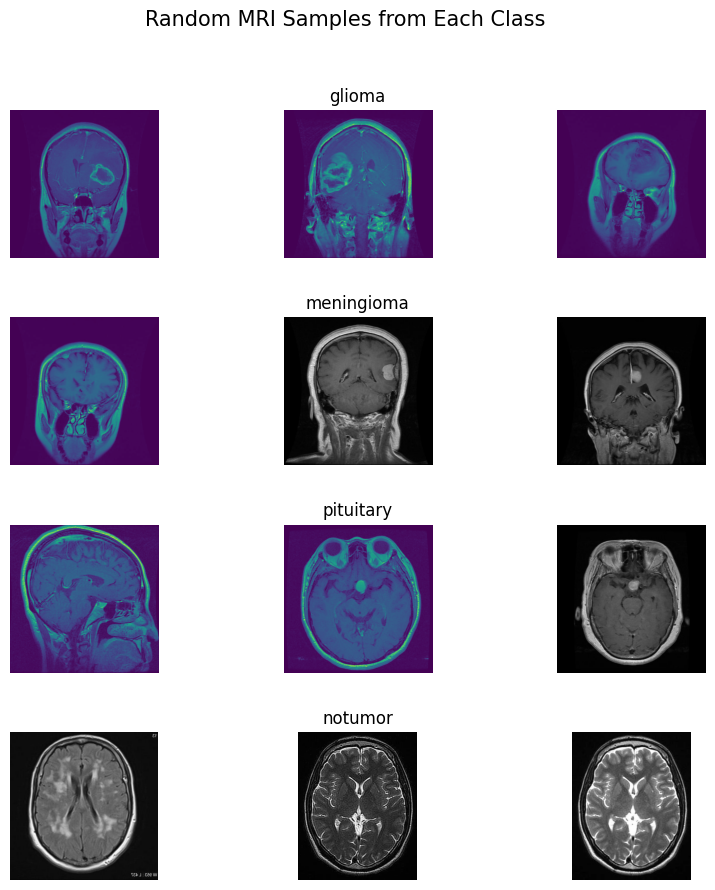

In [30]:
# Display 3 random samples from each class
fig, axes = plt.subplots(4, 3, figsize=(10,10))
plt.subplots_adjust(hspace=0.4)

for i, c in enumerate(CLASSES):
    class_dir = os.path.join(TRAIN_DIR, c)
    samples = random.sample(os.listdir(class_dir), 3)
    for j, s in enumerate(samples):
        img = Image.open(os.path.join(class_dir, s))
        axes[i, j].imshow(img)
        axes[i, j].axis("off")
        if j == 1:
            axes[i, j].set_title(c, fontsize=12)

plt.suptitle("Random MRI Samples from Each Class", fontsize=15)
plt.show()

In [31]:
sample_shapes = []

for c in CLASSES:
    img_path = os.path.join(TRAIN_DIR, c, random.choice(os.listdir(os.path.join(TRAIN_DIR, c))))
    img = Image.open(img_path)
    sample_shapes.append((c, img.size, img.mode))

pd.DataFrame(sample_shapes, columns=["Class", "Image Size (W,H)", "Mode"])

,Class,"Image Size (W,H)",Mode
0,glioma,"(512, 512)",L
1,meningioma,"(230, 241)",RGB
2,pituitary,"(512, 512)",RGB
3,notumor,"(300, 168)",RGB


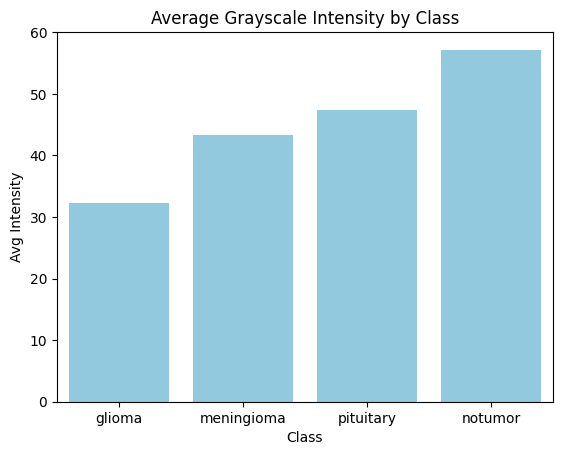

In [32]:
# Compute mean pixel intensity of random subset
image_stats = []
for c in CLASSES:
    class_dir = os.path.join(TRAIN_DIR, c)
    samples = random.sample(os.listdir(class_dir), 50)
    means = []
    for s in samples:
        img = Image.open(os.path.join(class_dir, s)).convert("L")
        means.append(np.mean(img))
    image_stats.append((c, np.mean(means)))

df_stats = pd.DataFrame(image_stats, columns=["Class", "Avg Intensity"])
sns.barplot(x="Class", y="Avg Intensity", data=df_stats, color="skyblue")
plt.title("Average Grayscale Intensity by Class")
plt.show()

In [33]:
print("Most images are RGB or grayscale with consistent sizes.")
print("Dataset is well-balanced across the four tumor classes.")
print("Average brightness is consistent, suggesting similar MRI acquisition parameters.")
print("Minimal preprocessing needed — resizing and normalization will be handled by the generator.")
print("Data ready for augmentation and model training")

Most images are RGB or grayscale with consistent sizes.
Dataset is well-balanced across the four tumor classes.
Average brightness is consistent, suggesting similar MRI acquisition parameters.
Minimal preprocessing needed — resizing and normalization will be handled by the generator.
Data ready for augmentation and model training
